In [1]:
import pandas as pd
import os

In [2]:
full_data = pd.DataFrame()

In [3]:
files = os.listdir("./Sales_Data")
for file in files:
    full_data = pd.concat([full_data,pd.read_csv('./Sales_Data/{}'.format(file))])
full_data.head()
    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
len(full_data)

186850

In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [6]:
full_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
df_na = full_data[full_data.isna().any(axis=1)]
df_na[:10]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
1571,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN
2265,NaN,NaN,NaN,NaN,NaN,NaN
2798,NaN,NaN,NaN,NaN,NaN,NaN
3024,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
full_data.dropna(inplace=True)

In [9]:
full_data[:10]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


In [10]:
full_data.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

## Drop the headers in the data

In [11]:
full_data[full_data['Order Date'] == "Order Date"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
full_data.drop(full_data[full_data['Order Date'] == "Order Date"].index,inplace=True)

In [13]:
full_data['Month'] = full_data['Order Date'].str[:2]

full_data['Month'].astype("int32")

0        4
2        4
3        4
4        4
5        4
        ..
11681    9
11682    9
11683    9
11684    9
11685    9
Name: Month, Length: 182735, dtype: int32

In [14]:
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [15]:
full_data['Order Date'] = pd.to_datetime(full_data['Order Date'],format="%m/%d/%y %H:%M")

## What is the best month interms of sales and how much we earned?

In [16]:
import matplotlib.pyplot as plt

In [17]:
full_data['Quantity Ordered'] = pd.to_numeric(full_data['Quantity Ordered'])
full_data['Price Each'] = pd.to_numeric(full_data['Price Each'])

In [18]:
full_data['Sales'] = full_data['Quantity Ordered']*full_data['Price Each']
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99


In [19]:
# Was getting the values in exponent so used the below command to suppress it
pd.set_option('display.float_format', '{:.2f}'.format)

In [20]:
results = full_data[['Month','Sales']].groupby('Month').sum()
results

,Sales
Month,
01,1786511.29
02,2158127.48
03,2755969.40
04,3336376.42
05,3101881.04
06,2524464.99
07,2587444.91
08,2191698.31
09,2050361.26


In [21]:
months = range(1,13)

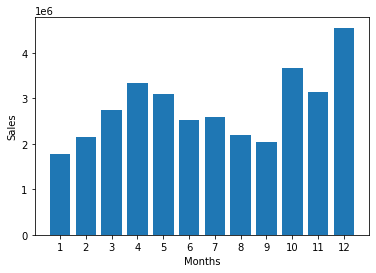

In [22]:
plt.bar(months,results['Sales'])
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks(months)
plt.show()

In [23]:
full_data['Sales'].max()

3400.0

## What is the most ordered product?

In [24]:
products = full_data.groupby('Product').sum()
products

,Quantity Ordered,Price Each,Sales
Product,,,
20in Monitor,4058,443479.68,446339.42
27in 4K Gaming Monitor,6134,2387518.78,2392198.66
27in FHD Monitor,7429,1107826.14,1114275.71
34in Ultrawide Monitor,6076,2301979.42,2308819.24
AA Batteries (4-pack),27148,77621.76,104248.32
AAA Batteries (4-pack),30487,60676.07,91156.13
Apple Airpods Headphones,15383,2290950.00,2307450.00
Bose SoundSport Headphones,13236,1310768.91,1323467.64
Flatscreen TV,4724,1411500.00,1417200.00


<AxesSubplot:ylabel='Product'>

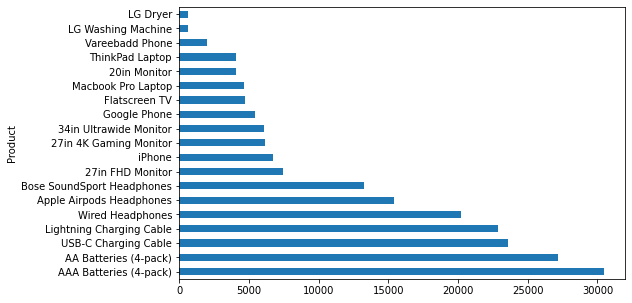

In [89]:
quantity = products.sort_values('Quantity Ordered',ascending=False)
quantity['Quantity Ordered'].plot(kind='barh',figsize=(8,5))

In [26]:
products.sort_values('Sales', ascending=False)

,Quantity Ordered,Price Each,Sales
Product,,,
Macbook Pro Laptop,4645,7889700.00,7896500.00
iPhone,6732,4707500.00,4712400.00
ThinkPad Laptop,4054,4051959.48,4053959.46
Google Phone,5440,3259800.00,3264000.00
27in 4K Gaming Monitor,6134,2387518.78,2392198.66
34in Ultrawide Monitor,6076,2301979.42,2308819.24
Apple Airpods Headphones,15383,2290950.00,2307450.00
Flatscreen TV,4724,1411500.00,1417200.00
Bose SoundSport Headphones,13236,1310768.91,1323467.64


## Which state has the highest sale?

In [27]:
full_data['State'] = full_data['Purchase Address'].str.split(",").str[1]
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles


In [28]:
# Adding the State column using lambda function

def get_city(address):
    return address.split(",")[1].strip()

def get_state(address):
    return address.split(",")[2].split(" ")[1]

full_data['City'] = full_data['Purchase Address'].apply(lambda x: get_city(x)+ " ("+get_state(x)+")")
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,Los Angeles (CA)


In [67]:
city = full_data.groupby("City").sum().sort_values("Quantity Ordered")
city

,Quantity Ordered,Price Each,Sales
City,,,
Portland (ME),2696,441701.73,444110.53
Austin (TX),10933,1777231.68,1786745.52
Portland (OR),11110,1822878.38,1832538.71
Seattle (WA),16281,2678871.35,2693048.60
Atlanta (GA),16304,2726247.35,2741642.05
Dallas (TX),16453,2702619.12,2717793.72
Boston (MA),22123,3580075.00,3604080.86
New York City (NY),27470,4553287.23,4581658.91
Los Angeles (CA),32722,5323915.79,5354039.93


<AxesSubplot:xlabel='City'>

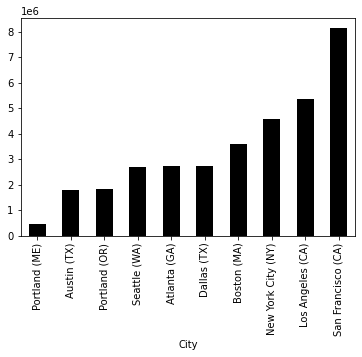

In [92]:
city['Sales'].plot(kind='bar',y='City',label="",color='black')

## What is the best time to run the advertisment?

In [110]:
full_data['time'] = full_data['Order Date'].dt.hour
full_data['Minute'] = full_data['Order Date'].dt.minute
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,City,time,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,Los Angeles (CA),9,27


In [121]:
time = full_data.groupby('time').sum()
time[['Quantity Ordered','Sales']]

,Quantity Ordered,Sales
time,,
0,4355,698694.76
1,2579,447663.86
2,1379,234191.08
3,912,142976.54
4,925,161350.57
5,1463,224313.72
6,2767,441523.14
7,4483,734595.75
8,6917,1181363.76


### This is another method to plot the groupby results

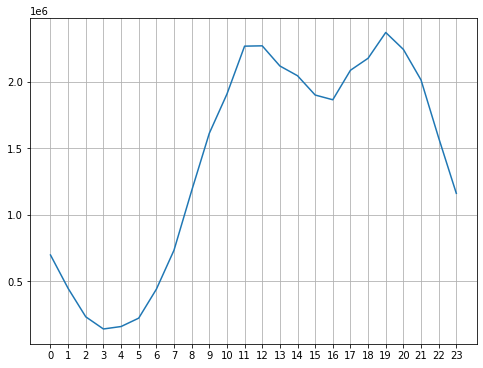

In [128]:
hours = [hour for hour,df in full_data.groupby('time')]
plt.plot(hours,time['Sales'])
plt.xticks(hours)
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

## What products are most often sold together?

In [171]:
sold_together = {i:[] for i in full_data['Order ID'].unique()}

for i,j in full_data[['Order ID','Product']].iterrows():
    sold_together[j[0]].append(j[1])

In [177]:
#display first 20 orders
dict(list(sold_together.items())[:20])

{'176558': ['USB-C Charging Cable'],
 '176559': ['Bose SoundSport Headphones'],
 '176560': ['Google Phone', 'Wired Headphones'],
 '176561': ['Wired Headphones'],
 '176562': ['USB-C Charging Cable'],
 '176563': ['Bose SoundSport Headphones'],
 '176564': ['USB-C Charging Cable'],
 '176565': ['Macbook Pro Laptop'],
 '176566': ['Wired Headphones'],
 '176567': ['Google Phone'],
 '176568': ['Lightning Charging Cable'],
 '176569': ['27in 4K Gaming Monitor'],
 '176570': ['AA Batteries (4-pack)'],
 '176571': ['Lightning Charging Cable'],
 '176572': ['Apple Airpods Headphones'],
 '176573': ['USB-C Charging Cable'],
 '176574': ['Google Phone', 'USB-C Charging Cable'],
 '176575': ['AAA Batteries (4-pack)'],
 '176576': ['Apple Airpods Headphones'],
 '176577': ['Apple Airpods Headphones']}

In [203]:
products_sold = []
c = dict(list(sold_together.items()))
for key,value in c.items():    
    if len(value)>1:
        products_sold.append(str(value))
    else:
        pass
products_sold[:20]

["['Google Phone', 'Wired Headphones']",
 "['Google Phone', 'USB-C Charging Cable']",
 "['Bose SoundSport Headphones', 'Bose SoundSport Headphones']",
 "['AAA Batteries (4-pack)', 'Google Phone']",
 "['Lightning Charging Cable', 'USB-C Charging Cable']",
 "['Apple Airpods Headphones', 'ThinkPad Laptop']",
 "['Bose SoundSport Headphones', 'AAA Batteries (4-pack)']",
 "['34in Ultrawide Monitor', 'Google Phone']",
 "['Lightning Charging Cable', 'USB-C Charging Cable']",
 "['iPhone', 'Lightning Charging Cable']",
 "['Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones']",
 "['Google Phone', 'USB-C Charging Cable']",
 "['Google Phone', 'Wired Headphones']",
 "['Google Phone', 'Wired Headphones']",
 "['AAA Batteries (4-pack)', '27in FHD Monitor']",
 "['USB-C Charging Cable', 'AAA Batteries (4-pack)']",
 "['Google Phone', 'USB-C Charging Cable']",
 "['iPhone', 'Wired Headphones']",
 "['iPhone', 'Wired Headphones']",
 "['iPhone', '27in 4K Gaming Monitor']"]

In [204]:
len(products_sold)

6928

In [206]:
products_df = pd.DataFrame(products_sold,columns=['Sold together'])
products_df

,Sold together
0,"['Google Phone', 'Wired Headphones']"
1,"['Google Phone', 'USB-C Charging Cable']"
2,"['Bose SoundSport Headphones', 'Bose SoundSpor..."
3,"['AAA Batteries (4-pack)', 'Google Phone']"
4,"['Lightning Charging Cable', 'USB-C Charging C..."
...,...
6923,"['Apple Airpods Headphones', 'Apple Airpods He..."
6924,"['Lightning Charging Cable', 'Lightning Chargi..."
6925,"['34in Ultrawide Monitor', 'AA Batteries (4-pa..."
6926,"['Wired Headphones', 'AAA Batteries (4-pack)']"


In [213]:
products_df.groupby('Sold together').size().sort_values(ascending=False)[:40]

Sold together
['iPhone', 'Lightning Charging Cable']                                860
['Google Phone', 'USB-C Charging Cable']                              828
['iPhone', 'Wired Headphones']                                        355
['Vareebadd Phone', 'USB-C Charging Cable']                           301
['Google Phone', 'Wired Headphones']                                  295
['iPhone', 'Apple Airpods Headphones']                                274
['Google Phone', 'Bose SoundSport Headphones']                        160
['Vareebadd Phone', 'Wired Headphones']                               104
['Google Phone', 'USB-C Charging Cable', 'Wired Headphones']           74
['Vareebadd Phone', 'Bose SoundSport Headphones']                      56
['Lightning Charging Cable', 'USB-C Charging Cable']                   55
['iPhone', 'Lightning Charging Cable', 'Wired Headphones']             53
['Lightning Charging Cable', 'Lightning Charging Cable']               51
['Lightning Charging Cab